In [1]:
#Gold ETF stock price prediction

In [2]:
#!pip install tensorflow
#!pip install keras
#!pip install pandas-datareader
import tensorflow
import keras
#!pip install pandas
import pandas
import numpy

In [3]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array
import sklearn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [4]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2020, 7, 31)

In [5]:
gld = web.DataReader("GLD", 'yahoo', start, end)

In [6]:
gld.to_csv('GLD.csv')

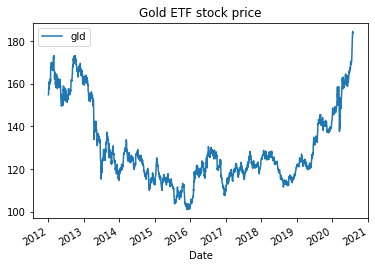

In [7]:
gld['Open'].plot(label = 'gld')

plt.title('Gold ETF stock price')
plt.legend()

In [8]:
#We are going to predict the price of one Gold ETF below. Similarly all other predictions can also be made. Let us chose Axisgold ETF

In [9]:
# Select Adjusted close data
data = gld[['Adj Close']]
print(data.shape)
data[-20:]

(2159, 1)


,Adj Close
Date,
2020-07-06,167.979996
2020-07-07,169.039993
2020-07-08,170.089996
2020-07-09,169.630005
2020-07-10,169.190002
2020-07-13,169.399994
2020-07-14,170.190002
2020-07-15,170.339996
2020-07-16,168.729996


In [10]:
#Split data 80% training 20% testing

training_size=int(len(data)*0.8)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size],data[training_size:len(data)]

In [11]:
#Data preporcesing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_data=scaler.fit_transform(np.array(train_data).reshape(-1,1))
test_data=scaler.fit_transform(np.array(test_data).reshape(-1,1))

In [12]:
#Data preporcesing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_scaled=scaler.fit_transform(np.array(data).reshape(-1,1))

In [13]:
print(data_scaled)

[[0.65253742]
 [0.6618393 ]
 [0.67443782]
 ...
 [0.99646782]
 [0.98033677]
 [1.        ]]


In [14]:
training_size,test_size

(1727, 432)

In [15]:
train_data

array([[0.75803581],
       [0.76884156],
       [0.78347693],
       ...,
       [0.21241962],
       [0.20900012],
       [0.19121876]])

In [16]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [17]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
#Moving average coefficients
x_train_ma = x_train
y_train_ma = y_train
x_test_ma = x_test
y_test_ma = y_test

In [19]:
train_pred_ma = []
for i in range(0,x_train_ma.shape[0]):
    a = x_train_ma[len(x_train_ma)-248+i:].sum() + sum(train_pred_ma)
    b = a/248
    train_pred_ma.append(b)

In [20]:
train_rms_ma=np.sqrt(np.mean(np.power((np.array(y_train_ma)-train_pred_ma),2)))
print('\n RMSE value on train set:')
print(train_rms_ma)


 RMSE value on train set:
25.7657820573263


In [21]:
test_pred_ma = []
for i in range(0,x_test_ma.shape[0]):
    c = x_test_ma[len(x_test_ma)-248+i:].sum() + sum(test_pred_ma)
    d = a/248
    test_pred_ma.append(d)

In [22]:
test_rms_ma=np.sqrt(np.mean(np.power((np.array(y_test_ma)-test_pred_ma),2)))
print('\n RMSE value on test set:')
print(test_rms_ma)


 RMSE value on test set:
95.96049953972931


In [23]:
train_pred_ma = np.array(train_pred_ma)
test_pred_ma = np.array(test_pred_ma)

train_pred_ma =train_pred_ma.reshape(train_pred_ma.shape[0], 1)
test_pred_ma = test_pred_ma.reshape(test_pred_ma.shape[0], 1)

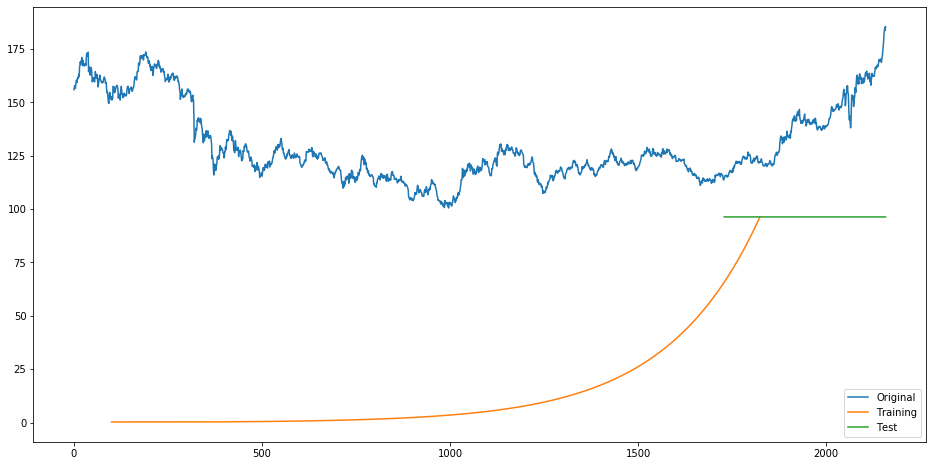

In [24]:
# shift train predictions for plotting
look_back=100
trainPredictPlot_ma = numpy.empty_like(data_scaled)
trainPredictPlot_ma[:, :] = np.nan
trainPredictPlot_ma[look_back:len(train_pred_ma)+look_back, :] = train_pred_ma
# shift test predictions for plotting
testPredictPlot_ma = numpy.empty_like(data_scaled)
testPredictPlot_ma[:, :] = numpy.nan
testPredictPlot_ma[len(train_pred_ma)+(look_back*2)-196:len(data_scaled)+100, :] = test_pred_ma
# plot baseline and predictions
plt.figure(figsize = (16,8))
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainPredictPlot_ma)
plt.plot(testPredictPlot_ma)
plt.legend(['Original','Training', 'Test'])
plt.show()

In [25]:
#Regression coefficients
x_train_lr = x_train
y_train_lr = y_train
x_test_lr = x_test
y_test_lr = y_test

In [26]:
x_train_lr

array([[0.75803581],
       [0.76884156],
       [0.78347693],
       ...,
       [0.2170702 ],
       [0.21255643],
       [0.21241962]])

In [27]:
x_train_lr =x_train_lr.reshape(x_train_lr.shape[0], 1)
x_test_lr = x_test_lr.reshape(x_test_lr.shape[0], 1)
y_train_lr =y_train_lr.reshape(y_train_lr.shape[0], 1)
y_test_lr = y_test_lr.reshape(y_test_lr.shape[0], 1)

In [28]:
x_train_lr

array([[0.75803581],
       [0.76884156],
       [0.78347693],
       ...,
       [0.2170702 ],
       [0.21255643],
       [0.21241962]])

In [29]:
y_train_lr

array([[0.76884156],
       [0.78347693],
       [0.77554365],
       ...,
       [0.21255643],
       [0.21241962],
       [0.20900012]])

In [30]:
print(x_train_lr.shape), print(y_train_lr.shape)

(1725, 1)
(1725, 1)


(None, None)

In [31]:
print(x_test_lr.shape), print(y_test_lr.shape)


(430, 1)
(430, 1)


(None, None)

In [32]:
x_train_lr.shape, x_test_lr.shape

((1725, 1), (430, 1))

In [33]:
x_train_lr

array([[0.75803581],
       [0.76884156],
       [0.78347693],
       ...,
       [0.2170702 ],
       [0.21255643],
       [0.21241962]])

In [34]:
#Create models
#Create decision tree model
#modeltree = DecisionTreeRegressor()
#modeltree.fit(x_train, y_train)

#Create linear decision model
modellr = LinearRegression()
modellr.fit(x_train_lr, y_train_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(modellr.coef_)))
# The Intercept
print('Intercept: ', modellr.intercept_)

Slope:  0.9968814488260845
Intercept:  [0.00082801]


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  from ipykernel import kernelapp as app


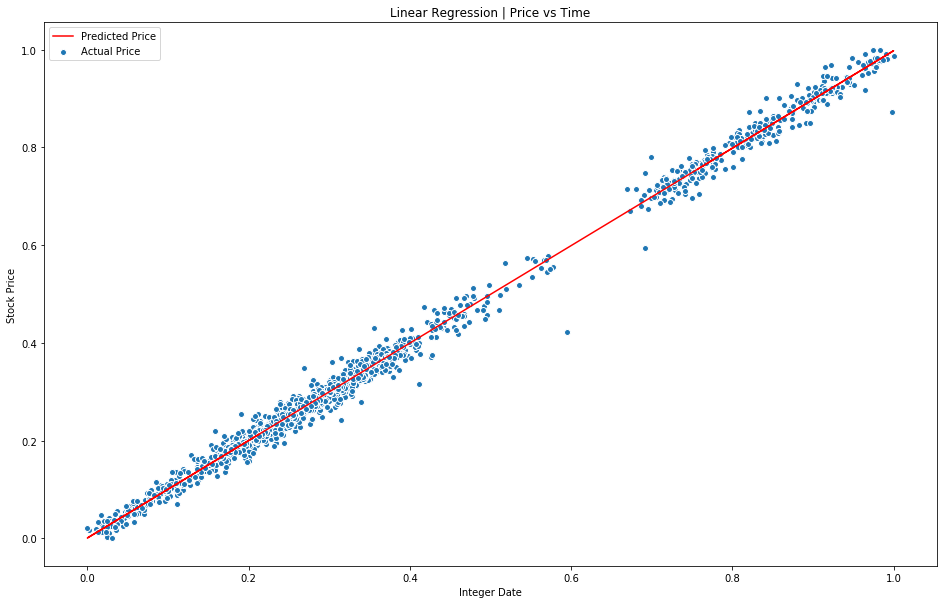

In [36]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(x_train_lr, y_train_lr, edgecolor='w', label='Actual Price')
plt.plot(x_train_lr, modellr.predict(x_train_lr), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [37]:
# Create test arrays
x_test_lr

array([[0.00000000e+00],
       [5.57242473e-04],
       [1.36546729e-02],
       [1.54659767e-02],
       [2.73094522e-02],
       [2.80060584e-02],
       [2.80060584e-02],
       [3.06534386e-02],
       [2.93993772e-02],
       [2.75880734e-02],
       [1.79739931e-02],
       [2.39653595e-02],
       [2.89813922e-02],
       [2.61947546e-02],
       [3.83168513e-02],
       [4.82095529e-02],
       [4.84881742e-02],
       [6.17248621e-02],
       [5.60122232e-02],
       [5.40615556e-02],
       [5.75449057e-02],
       [5.39221919e-02],
       [4.73734766e-02],
       [5.86596033e-02],
       [6.25609384e-02],
       [5.25288731e-02],
       [7.77482939e-02],
       [7.05029725e-02],
       [8.86163293e-02],
       [8.36004029e-02],
       [9.62797421e-02],
       [1.03107079e-01],
       [1.05754459e-01],
       [1.06869156e-01],
       [1.22195876e-01],
       [1.08401839e-01],
       [1.14253841e-01],
       [1.09655794e-01],
       [1.20523829e-01],
       [1.10491764e-01],


In [38]:
# Generate array with predicted values
train_pred_lr = modellr.predict(x_train_lr)
test_pred_lr = modellr.predict(x_test_lr)

In [43]:
x_train_lr=scaler.inverse_transform(x_train_lr)
x_test_lr=scaler.inverse_transform(x_test_lr)
y_train_lr=scaler.inverse_transform(y_train_lr)
y_test_lr=scaler.inverse_transform(y_test_lr)
train_pred_lr=scaler.inverse_transform(train_pred_lr)
test_pred_lr=scaler.inverse_transform(test_pred_lr)

In [44]:
print(x_train_lr)
print(train_pred_lr)

[[164.87997537]
 [165.79770782]
 [167.04068987]
 ...
 [118.93577084]
 [118.55241626]
 [118.54079704]]
[[164.74952601]
 [165.66439646]
 [166.9035022 ]
 ...
 [118.94860082]
 [118.56644176]
 [118.55485878]]


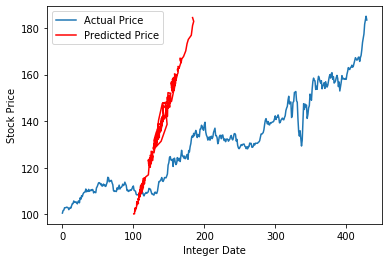

In [45]:
plt.plot(y_test_lr, label='Actual Price')
plt.plot(y_test_lr, modellr.predict(x_test_lr), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [46]:
### Calculate RMSE performance metrics

print("Test Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_test_lr, modellr.predict(x_test_lr)))))
print("Test Linear Regression Mean Squared error is {}".format(mean_squared_error(y_test_lr, modellr.predict(x_test_lr))))


Test Linear Regression Root Mean Squared error is:1.7157370632026676
Test Linear Regression Mean Squared error is 2.9437536700473146


In [49]:
print(x_test_lr.shape) 
print(train_pred_lr.shape)
print(x_train_lr.shape)
print(test_pred_lr.shape)

(430, 1)
(1725, 1)
(1725, 1)
(430, 1)


In [51]:
###LSTM CODE BELOW

In [52]:
#LSTM coefficients
x_train_lstm = x_train
y_train_lstm = y_train
x_test_lstm = x_test
y_test_lstm = y_test

In [53]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train_lstm =x_train_lstm.reshape(x_train_lstm.shape[0],x_train_lstm.shape[1] , 1)
x_test_lstm = x_test_lstm.reshape(x_test_lstm.shape[0],x_test_lstm.shape[1] , 1)

In [54]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout, Activation
from sklearn.metrics import r2_score


In [55]:
def model_funt(layer):
        model_1=Sequential()
        model_1.add(LSTM(layer[0],return_sequences=True,input_shape=(5,1)))
        model_1.add(Dropout(0.3))
        #model.add(LSTM(100,return_sequences=True))
        #model.add(Dropout(0.5))
        #model.add(LSTM(100,return_sequences=True))
        #model.add(Dropout(0.5))
        model_1.add(LSTM(layer[1]))
        #model.add(Dropout(0.5))
        model_1.add(Dense(layer[2]))
        model_1.add(Activation("linear"))
        #model_1.compile(loss='mse',optimizer='adam')
        
        return model_1

Epoch 1/50
27/27 [==============================] - 1s 31ms/step - loss: 0.0989 - val_loss: 0.0801
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0704 - val_loss: 0.0562
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0493 - val_loss: 0.0395
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0352 - val_loss: 0.0283
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0259 - val_loss: 0.0220
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0215 - val_loss: 0.0190
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0176
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.0166
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.0157
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.0147
Epoch 11/50
27/27 

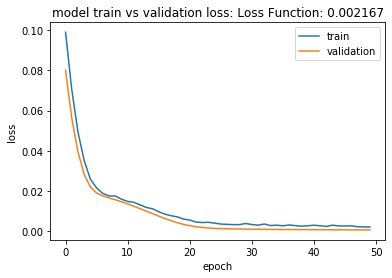

Epoch 1/50
27/27 [==============================] - 1s 34ms/step - loss: 0.1012 - val_loss: 0.0854
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0774 - val_loss: 0.0643
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0575 - val_loss: 0.0472
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.0336
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0295 - val_loss: 0.0247
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0221 - val_loss: 0.0202
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0195 - val_loss: 0.0184
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0181 - val_loss: 0.0175
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.0167
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.0157
Epoch 11/50
27/27 

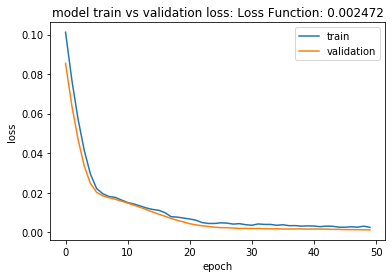

Epoch 1/50
27/27 [==============================] - 1s 31ms/step - loss: 0.0825 - val_loss: 0.0490
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.0136
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0109
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.0077
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 6.7132e-04
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 8.9291e-04 - val_loss: 5.8970e-04
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 9.4236e-04 - val_loss: 5.6845e-0

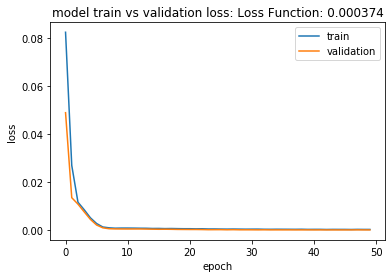

Epoch 1/50
27/27 [==============================] - 1s 29ms/step - loss: 0.1040 - val_loss: 0.0886
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0806 - val_loss: 0.0682
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0618 - val_loss: 0.0521
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0474 - val_loss: 0.0398
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0360 - val_loss: 0.0309
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.0251
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.0216
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0210 - val_loss: 0.0197
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0204 - val_loss: 0.0186
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0178
Epoch 11/50
27/27 

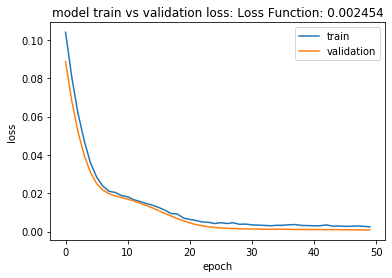

Epoch 1/50
27/27 [==============================] - 1s 32ms/step - loss: 0.1033 - val_loss: 0.0872
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0789 - val_loss: 0.0657
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0587 - val_loss: 0.0481
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0426 - val_loss: 0.0349
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0310 - val_loss: 0.0263
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0242 - val_loss: 0.0219
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0213 - val_loss: 0.0200
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.0190
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0190 - val_loss: 0.0180
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0174 - val_loss: 0.0170
Epoch 11/50
27/27 

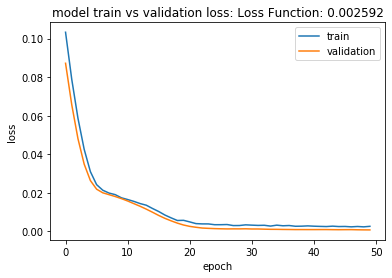

Epoch 1/50
27/27 [==============================] - 1s 30ms/step - loss: 0.1056 - val_loss: 0.0906
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0817 - val_loss: 0.0680
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0619 - val_loss: 0.0512
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0465 - val_loss: 0.0389
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0353 - val_loss: 0.0302
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.0247
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0235 - val_loss: 0.0217
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0213 - val_loss: 0.0201
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0196 - val_loss: 0.0192
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0190 - val_loss: 0.0184
Epoch 11/50
27/27 

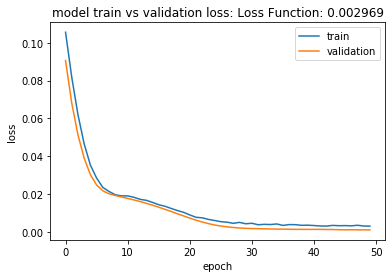

Epoch 1/50
27/27 [==============================] - 1s 29ms/step - loss: 0.1080 - val_loss: 0.0946
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0886 - val_loss: 0.0768
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0720 - val_loss: 0.0624
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0581 - val_loss: 0.0503
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0471 - val_loss: 0.0406
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0378 - val_loss: 0.0332
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0314 - val_loss: 0.0278
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0262 - val_loss: 0.0243
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0236 - val_loss: 0.0222
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0220 - val_loss: 0.0210
Epoch 11/50
27/27 

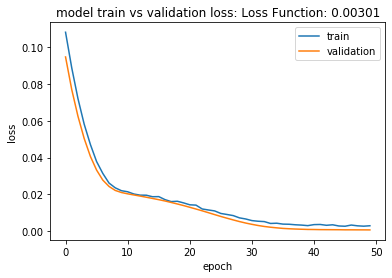

Epoch 1/50
27/27 [==============================] - 1s 29ms/step - loss: 0.1005 - val_loss: 0.0804
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0684 - val_loss: 0.0522
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0424 - val_loss: 0.0312
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0254 - val_loss: 0.0203
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.0174
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0164 - val_loss: 0.0159
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0152 - val_loss: 0.0143
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.0125
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.0106
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0087
Epoch 11/50
27/27 

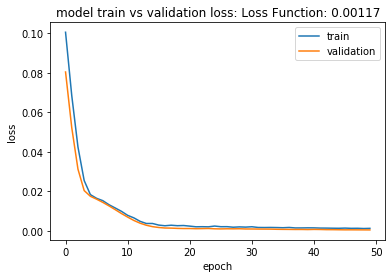

Epoch 1/50
27/27 [==============================] - 1s 31ms/step - loss: 0.0667 - val_loss: 0.0213
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0129 - val_loss: 0.0107
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.0060
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 6.2814e-04
Epoch 6/50
27/27 [==============================] - 0s 5ms/step - loss: 6.0552e-04 - val_loss: 3.9711e-04
Epoch 7/50
27/27 [==============================] - 0s 5ms/step - loss: 5.6493e-04 - val_loss: 3.8129e-04
Epoch 8/50
27/27 [==============================] - 0s 5ms/step - loss: 5.7469e-04 - val_loss: 3.7705e-04
Epoch 9/50
27/27 [==============================] - 0s 5ms/step - loss: 5.5963e-04 - val_loss: 3.5721e-04
Epoch 10/50
27/27 [==============================] - 0s 5ms/step - loss: 5.1351e-

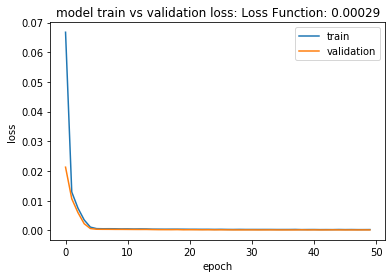

Epoch 1/75
27/27 [==============================] - 1s 30ms/step - loss: 0.1063 - val_loss: 0.0906
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0826 - val_loss: 0.0696
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0634 - val_loss: 0.0529
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0480 - val_loss: 0.0404
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0366 - val_loss: 0.0313
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.0255
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0243 - val_loss: 0.0225
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0213 - val_loss: 0.0209
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.0198
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0195 - val_loss: 0.0187
Epoch 11/75
27/27 

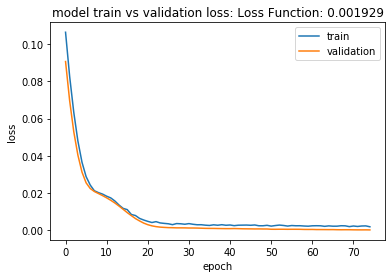

Epoch 1/75
27/27 [==============================] - 1s 29ms/step - loss: 0.1055 - val_loss: 0.0898
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0820 - val_loss: 0.0693
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0631 - val_loss: 0.0528
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0478 - val_loss: 0.0399
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0357 - val_loss: 0.0301
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0273 - val_loss: 0.0239
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.0205
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.0189
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.0177
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.0166
Epoch 11/75
27/27 

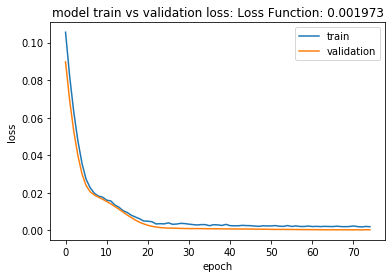

Epoch 1/75
27/27 [==============================] - 1s 30ms/step - loss: 0.0837 - val_loss: 0.0480
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0260 - val_loss: 0.0137
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.0110
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0075
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0042
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 8.6366e-04
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 9.5528e-04 - val_loss: 5.7924e-04
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 8.4269e-04 - val_loss: 5.2857e-04
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 9.0127e-04 - val_loss: 5

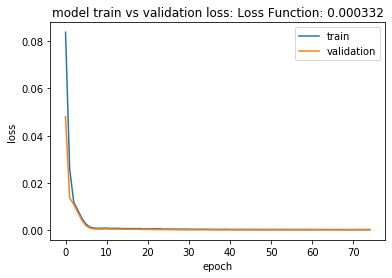

Epoch 1/75
27/27 [==============================] - 1s 29ms/step - loss: 0.1158 - val_loss: 0.1124
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.1158 - val_loss: 0.1124
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.1158 - val_loss: 0.1124
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.1158 - val_loss: 0.1124
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.1158 - val_loss: 0.1124
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.1158 - val_loss: 0.1124
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.1158 - val_loss: 0.1124
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 0.1158 - val_loss: 0.1124
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 0.1158 - val_loss: 0.1124
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 0.1158 - val_loss: 0.1124
Epoch 11/75
27/27 

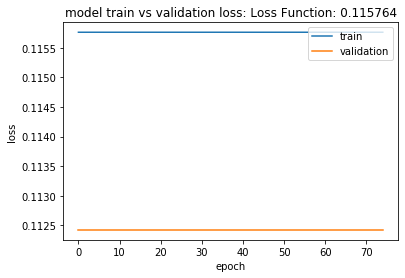

Epoch 1/75
27/27 [==============================] - 1s 29ms/step - loss: 0.1000 - val_loss: 0.0839
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0756 - val_loss: 0.0625
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0554 - val_loss: 0.0454
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.0329
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0295 - val_loss: 0.0250
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0235 - val_loss: 0.0210
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0193
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0183
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.0174
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0169 - val_loss: 0.0164
Epoch 11/75
27/27 

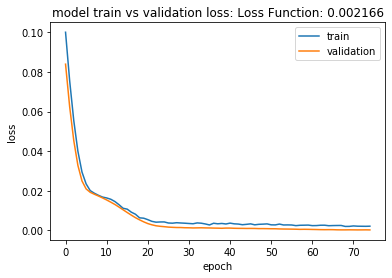

Epoch 1/75
27/27 [==============================] - 1s 29ms/step - loss: 0.1066 - val_loss: 0.0946
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0897 - val_loss: 0.0791
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0746 - val_loss: 0.0653
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0611 - val_loss: 0.0530
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0491 - val_loss: 0.0422
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0334
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0313 - val_loss: 0.0271
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.0232
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.0211
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0209 - val_loss: 0.0201
Epoch 11/75
27/27 

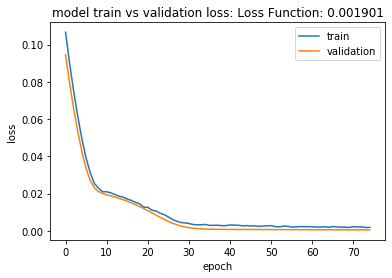

Epoch 1/75
27/27 [==============================] - 1s 30ms/step - loss: 0.1032 - val_loss: 0.0879
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0805 - val_loss: 0.0684
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0628 - val_loss: 0.0531
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0489 - val_loss: 0.0415
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0381 - val_loss: 0.0330
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0312 - val_loss: 0.0272
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0260 - val_loss: 0.0234
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.0213
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0210 - val_loss: 0.0201
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.0192
Epoch 11/75
27/27 

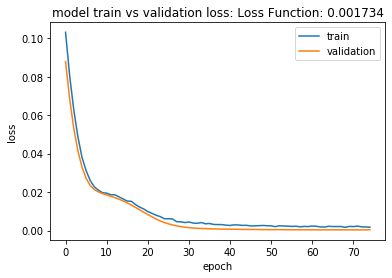

Epoch 1/75
27/27 [==============================] - 1s 29ms/step - loss: 0.1010 - val_loss: 0.0833
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0729 - val_loss: 0.0575
Epoch 3/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0479 - val_loss: 0.0359
Epoch 4/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0289 - val_loss: 0.0221
Epoch 5/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0190 - val_loss: 0.0171
Epoch 6/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.0156
Epoch 7/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.0141
Epoch 8/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.0125
Epoch 9/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.0108
Epoch 10/75
27/27 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0090
Epoch 11/75
27/27 

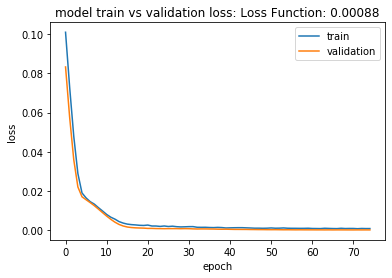

Epoch 1/75
27/27 [==============================] - 1s 32ms/step - loss: 0.0639 - val_loss: 0.0189
Epoch 2/75
27/27 [==============================] - 0s 5ms/step - loss: 0.0120 - val_loss: 0.0102
Epoch 3/75
27/27 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.0056
Epoch 4/75
27/27 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 5/75
27/27 [==============================] - 0s 4ms/step - loss: 9.7906e-04 - val_loss: 5.5766e-04
Epoch 6/75
27/27 [==============================] - 0s 4ms/step - loss: 5.5888e-04 - val_loss: 3.5592e-04
Epoch 7/75
27/27 [==============================] - 0s 4ms/step - loss: 5.5000e-04 - val_loss: 3.5781e-04
Epoch 8/75
27/27 [==============================] - 0s 5ms/step - loss: 5.5928e-04 - val_loss: 3.5649e-04
Epoch 9/75
27/27 [==============================] - 0s 4ms/step - loss: 5.4316e-04 - val_loss: 3.4493e-04
Epoch 10/75
27/27 [==============================] - 0s 5ms/step - loss: 4.81

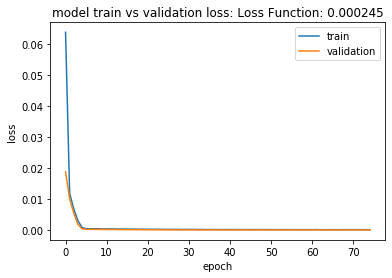

Epoch 1/100
27/27 [==============================] - 1s 30ms/step - loss: 0.1019 - val_loss: 0.0848
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0759 - val_loss: 0.0624
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0554 - val_loss: 0.0453
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0330
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0294 - val_loss: 0.0251
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.0209
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0209 - val_loss: 0.0189
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0191 - val_loss: 0.0178
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.0169
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.0160
Epoch 11

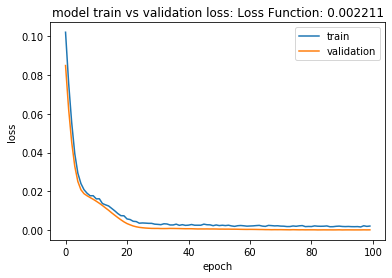

Epoch 1/100
27/27 [==============================] - 1s 30ms/step - loss: 0.1032 - val_loss: 0.0893
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0828 - val_loss: 0.0710
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0652 - val_loss: 0.0551
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0502 - val_loss: 0.0420
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0380 - val_loss: 0.0319
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0291 - val_loss: 0.0250
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0232 - val_loss: 0.0211
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0206 - val_loss: 0.0193
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0191 - val_loss: 0.0183
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.0173
Epoch 11

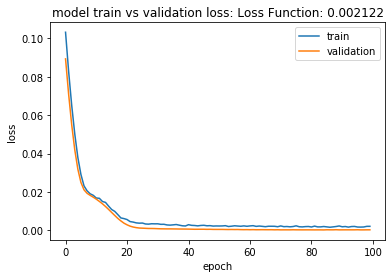

Epoch 1/100
27/27 [==============================] - 1s 30ms/step - loss: 0.0799 - val_loss: 0.0435
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.0131
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.0103
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0067
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 6.8709e-04
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 9.0495e-04 - val_loss: 5.5732e-04
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 9.6448e-04 - val_loss: 5.4648e-04
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 8.5967e-04 - v

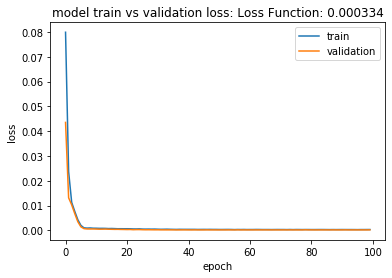

Epoch 1/100
27/27 [==============================] - 1s 29ms/step - loss: 0.1044 - val_loss: 0.0888
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0810 - val_loss: 0.0686
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0621 - val_loss: 0.0523
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0469 - val_loss: 0.0395
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0356 - val_loss: 0.0300
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.0238
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0219 - val_loss: 0.0206
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0190
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0191 - val_loss: 0.0178
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 0.0167
Epoch 11

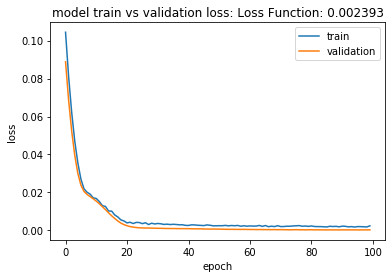

Epoch 1/100
27/27 [==============================] - 1s 30ms/step - loss: 0.1011 - val_loss: 0.0820
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0711 - val_loss: 0.0565
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0493 - val_loss: 0.0394
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0347 - val_loss: 0.0291
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0265 - val_loss: 0.0239
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0226 - val_loss: 0.0219
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0208 - val_loss: 0.0209
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0206 - val_loss: 0.0200
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.0190
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.0179
Epoch 11

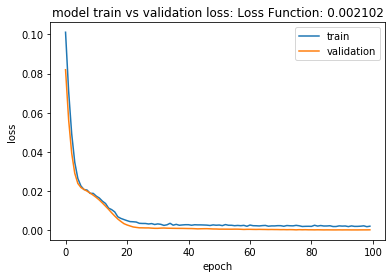

Epoch 1/100
27/27 [==============================] - 1s 29ms/step - loss: 0.1078 - val_loss: 0.0948
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0890 - val_loss: 0.0777
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0726 - val_loss: 0.0629
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0583 - val_loss: 0.0501
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0460 - val_loss: 0.0396
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0360 - val_loss: 0.0313
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0290 - val_loss: 0.0257
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0243 - val_loss: 0.0224
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0219 - val_loss: 0.0207
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0209 - val_loss: 0.0198
Epoch 11

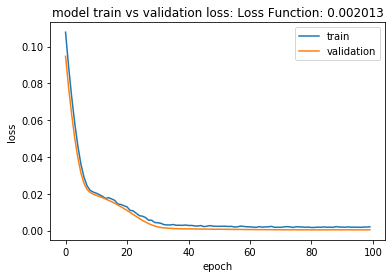

Epoch 1/100
27/27 [==============================] - 1s 30ms/step - loss: 0.1001 - val_loss: 0.0860
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0793 - val_loss: 0.0677
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0620 - val_loss: 0.0528
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0483 - val_loss: 0.0410
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0374 - val_loss: 0.0321
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.0258
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0244 - val_loss: 0.0217
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0214 - val_loss: 0.0194
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0195 - val_loss: 0.0180
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.0170
Epoch 11

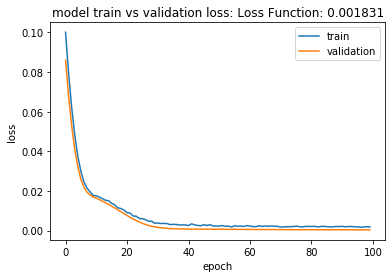

Epoch 1/100
27/27 [==============================] - 1s 30ms/step - loss: 0.1071 - val_loss: 0.0889
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0777 - val_loss: 0.0619
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0527 - val_loss: 0.0405
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0337 - val_loss: 0.0262
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.0203
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0190 - val_loss: 0.0185
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0174 - val_loss: 0.0169
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0156 - val_loss: 0.0151
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.0130
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.0107
Epoch 11

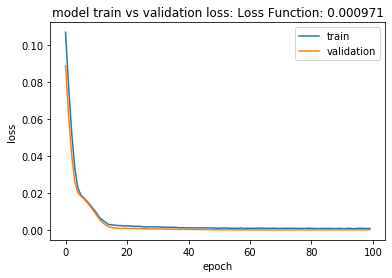

Epoch 1/100
27/27 [==============================] - 1s 32ms/step - loss: 0.0679 - val_loss: 0.0227
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0130 - val_loss: 0.0114
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0079 - val_loss: 0.0061
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 9.0291e-04 - val_loss: 4.4068e-04
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 5.9489e-04 - val_loss: 3.5442e-04
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 5.6557e-04 - val_loss: 4.1862e-04
Epoch 8/100
27/27 [==============================] - 0s 5ms/step - loss: 5.4094e-04 - val_loss: 3.9028e-04
Epoch 9/100
27/27 [==============================] - 0s 5ms/step - loss: 5.3920e-04 - val_loss: 3.5772e-04
Epoch 10/100
27/27 [==============================] - 0s 5ms/step - 

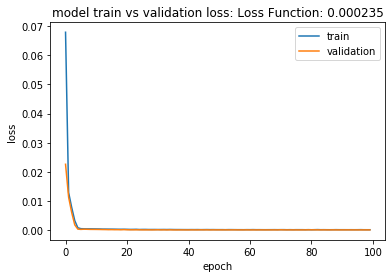

In [56]:
#best_model = None
#model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),epochs=50,batch_size=64,verbose=1)
epochs =[50, 75, 100]
# layers = [[4,1], [5,1], [7,1], [6,1], [,1]]

layers = [[4,5,1], [4,4,1], [50,50,1], [4,3,1], [4,6,1], [4,2,1], [4,1,1], [10,10,1], [100,100,1]]
model = 1
final_model = None
max = -100000
for epoch in epochs:
    for layer in layers:
        model_1 = model_funt(layer)
        model_1.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
        history = model_1.fit(x_train_lstm, y_train_lstm, validation_data=(x_test_lstm,y_test_lstm), epochs=epoch,batch_size=64,verbose=1)
        train_pred_lstm = model_1.predict(x_train_lstm)
        print (model, " mean is: ", np.mean(train_pred_lstm), " variance is: ", np.var(train_pred_lstm))
        if(max < (r2_score(y_train_lstm, train_pred_lstm))):
            max = r2_score(y_train_lstm, train_pred_lstm)
            final_model = model_1
            final_epoch = epoch
            final_layers = layers
        
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model train vs validation loss')
        plt.title('model train vs validation loss: Loss Function: ' + str(round(history.history['loss'][-1], 6)))
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper right')
        plt.show()

        # Use the last loss as the title
        #plt.title('model train vs validation loss: Loss Function: ' + str(round(history.history['loss'][-1], 6)))
       # plt.show()

In [57]:
final_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 5, 100)            40800     
_________________________________________________________________
dropout_17 (Dropout)         (None, 5, 100)            0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_17 (Activation)   (None, 1)                 0         
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


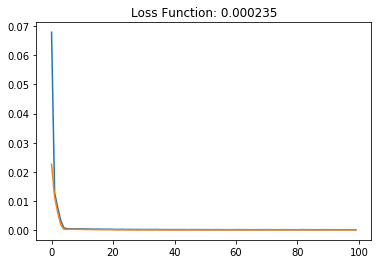

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function: ' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [59]:
print(final_layers)
print(final_epoch)

[[4, 5, 1], [4, 4, 1], [50, 50, 1], [4, 3, 1], [4, 6, 1], [4, 2, 1], [4, 1, 1], [10, 10, 1], [100, 100, 1]]
75


In [60]:
### Lets Do the prediction and check performance metrics
train_pred_lstm=final_model.predict(x_train_lstm)
test_pred_lstm=final_model.predict(x_test_lstm)

In [61]:
##Transformback to original form
train_pred_lstm=scaler.inverse_transform(train_pred_lstm)
test_pred_lstm=scaler.inverse_transform(test_pred_lstm)


In [62]:
# reshape input to be [samples, time steps, features] which is required for LSTM
y_train_lstm =y_train_lstm.reshape(y_train_lstm.shape[0], 1)
y_test_lstm = y_test_lstm.reshape(y_test_lstm.shape[0], 1)
x_test_lstm = x_test_lstm.reshape(x_test_lstm.shape[0], 1)

y_train_lstm=scaler.inverse_transform(y_train_lstm)
y_test_lstm=scaler.inverse_transform(y_test_lstm)
x_test_lstm=scaler.inverse_transform(x_test_lstm)

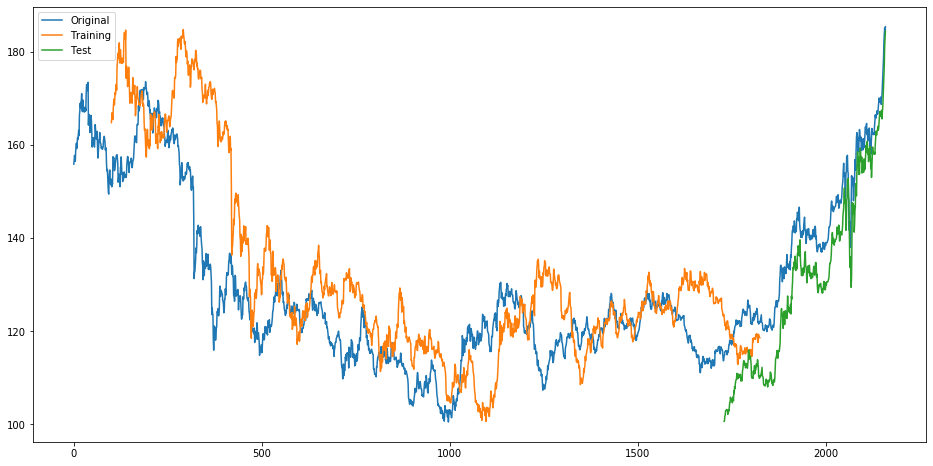

In [63]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred_lstm)+look_back, :] = train_pred_lstm
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data_scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_pred_lstm)+(look_back*2)-196:len(data)+100, :] = test_pred_lstm
# plot baseline and predictions
plt.figure(figsize = (16,8))
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original','Training', 'Test'])
plt.show()

In [64]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
print("Training Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_train_lstm,train_pred_lstm))))
print("Traning Linear Regression Mean Squared error is {}".format(mean_squared_error(y_train_lstm,train_pred_lstm)))

Training Linear Regression Root Mean Squared error is:1.4336626932336407
Traning Linear Regression Mean Squared error is 2.055388717969936


In [65]:
### Test Data RMSE
print("Test Linear Regression Root Mean Squared error is:{}". format(math.sqrt(mean_squared_error(y_test_lstm,test_pred_lstm))))
print("Test Linear Regression Mean Squared error is {}".format(mean_squared_error(y_test_lstm,test_pred_lstm)))


Test Linear Regression Root Mean Squared error is:1.6166342884273497
Test Linear Regression Mean Squared error is 2.613506422519003


In [66]:
test_pred_lstm =test_pred_lstm.reshape(test_pred_lstm.shape[0], 1)
x_test_lstm = x_test_lstm.reshape(x_test_lstm.shape[0], 1)
# y_train_lr =y_train_lr.reshape(y_train_lr.shape[0], 1)
# y_test_lr = y_test_lr.reshape(y_test_lr.shape[0], 1)

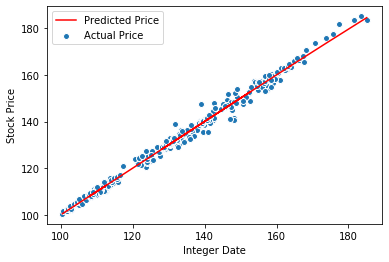

In [67]:
plt.scatter(x_test_lstm, y_test_lstm, edgecolor='w', label='Actual Price')
plt.plot(x_test_lstm, test_pred_lstm, color='r', label='Predicted Price')
#plt.plot(test_pred_lstm, color='r', label=' Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [68]:
len(data_scaled)
data_scaled

array([[0.65253742],
       [0.6618393 ],
       [0.67443782],
       ...,
       [0.99646782],
       [0.98033677],
       [1.        ]])

In [69]:
#Predicting to next 1 day data using previous 7 days
x_input=data_scaled[len(data_scaled)-1:].reshape(1,-1)
x_input.shape

(1, 1)

In [70]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [71]:
len(temp_input)

1

In [72]:
temp_input

[1.0000000000000002]

In [73]:
x_input

array([[1.]])

In [74]:
from numpy import array

lst_output=[]
n_steps=1
i=0
while(i<7):
    
    if(len(temp_input)>1):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = final_model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = final_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.99281985]
2
1 day input [0.99281985]
1 day output [[0.9859324]]
2 day input [0.98593241]
2 day output [[0.97931963]]
3 day input [0.97931963]
3 day output [[0.97296464]]
4 day input [0.97296464]
4 day output [[0.9668523]]
5 day input [0.96685231]
5 day output [[0.9609685]]
6 day input [0.96096849]
6 day output [[0.95530003]]
[[0.9928198456764221], [0.9859324097633362], [0.9793196320533752], [0.9729646444320679], [0.9668523073196411], [0.9609684944152832], [0.9553000330924988]]


In [75]:
day_new=np.arange(1,len(lst_output)+1)
day_pred=np.arange(len(lst_output)+1,len(lst_output)+8)

In [76]:
len(day_new)

7

In [77]:
lst_output

[[0.9928198456764221],
 [0.9859324097633362],
 [0.9793196320533752],
 [0.9729646444320679],
 [0.9668523073196411],
 [0.9609684944152832],
 [0.9553000330924988]]

In [78]:
day_pred.shape

(7,)

In [79]:
tx = scaler.inverse_transform(lst_output)
tx

array([[184.82018222],
       [184.23523234],
       [183.67360918],
       [183.13388013],
       [182.61475938],
       [182.11504719],
       [181.63362481]])

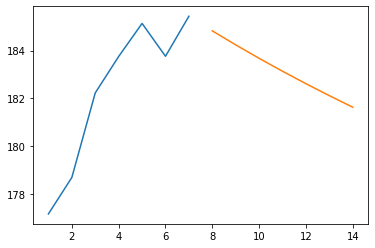

In [80]:
plt.plot(day_new,scaler.inverse_transform(data_scaled[len(data_scaled)-7:]))
plt.plot(day_pred,tx)

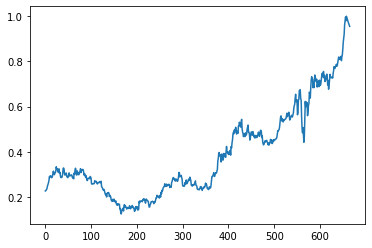

In [81]:
df3=data_scaled.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

In [82]:
df3=scaler.inverse_transform(df3).tolist()

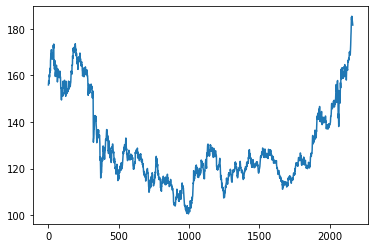

In [83]:
plt.plot(df3)

In [84]:
df3[-40:]

[[162.25],
 [162.55999755859375],
 [162.24000549316406],
 [164.02999877929688],
 [165.08999633789062],
 [166.47999572753906],
 [165.89999389648438],
 [165.8000030517578],
 [166.5399932861328],
 [166.6300048828125],
 [167.3699951171875],
 [166.6199951171875],
 [166.97999572753906],
 [167.97999572753906],
 [169.0399932861328],
 [170.08999633789062],
 [169.6300048828125],
 [169.19000244140625],
 [169.39999389648438],
 [170.19000244140625],
 [170.33999633789065],
 [168.72999572753906],
 [170.1199951171875],
 [170.94000244140622],
 [173.0],
 [175.63000488281253],
 [177.17999267578128],
 [178.69999694824222],
 [182.22999572753906],
 [183.75],
 [185.1300048828125],
 [183.75999450683594],
 [185.42999267578125],
 [184.8201822216688],
 [184.2352323400155],
 [183.67360917754195],
 [183.13388012540963],
 [182.61475937921932],
 [182.11504719234654],
 [181.6336248137195]]